# Zadanie

Z populacji, w której badana cecha ma rozkład $N(\mu,4)$ wylosowano próbkę złożoną z $9$ obserwacji. Na poziomie istotności $\alpha=0.05$ zweryfikować hipotezę 

<ul>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$ </li>
</ul>

jeżeli średnia z punktów wynosi $\bar X = 1.4$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b> znanym $\sigma$ </b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 > \mu_0
$$


W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
[u(1-\alpha), +\infty)
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:


$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 < \mu_0
$$

W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
(-\infty,-u(\alpha)]
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.

## Model 3

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 \neq \mu_0
$$

W tym teście używa się statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
\big(-\infty,-u(1-\frac{1}{2}\alpha)\big] \cup \big[u(1-\frac{1}{2}\alpha), +\infty \big)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Zdefiniujmy zmienną losową

In [3]:
n=9
(mu, sigma)=(0,1)
X=stats.norm(mu, sigma)

## Wyliczmy wartość statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

In [4]:
alpha=0.05 # poziom istotności alfa, podane w zadaniu
bar_x = 1.4 # średnia arytm. podane w zadaniu 1.4
mu=2 # hipoteza H0: mu = 2
s = 4 # s - odch.standard., podane w zadaniu = 4
u = (bar_x - mu)/s*np.sqrt(n)
print(mu)
print(bar_x)
print(s)
print(u)

2
1.4
4
-0.45000000000000007


# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$

## Wypisz przedział krytyczny

In [5]:
L=-np.infty

In [6]:
R=-X.ppf(1-alpha)

In [8]:
print(r'( %3.2f , %3.2f)' % (L,R))

( -inf , -1.64)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [10]:
# sprawdzenie czy wartość statystyki U wpada w lewy ogon
if u < R:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [11]:
p = X.cdf(u)
print(p)

0.32635522028791997


## zweryfikuj hipotezę na podstawie wartości p-value

In [12]:
# sprawdzenie czy p-value wpada w lewy ogon, czyli mniejsze niż 0.05
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

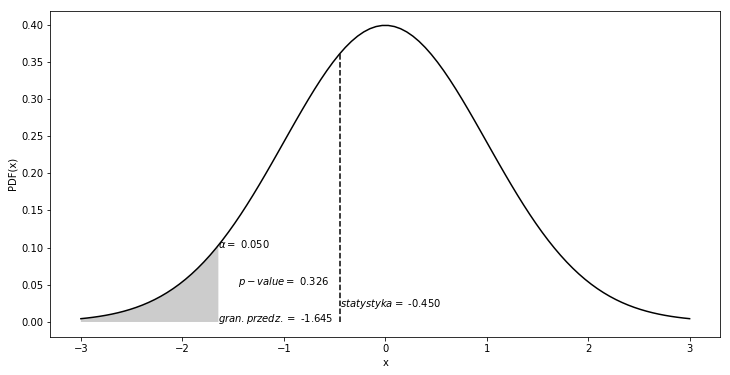

In [18]:
u_1=X.ppf(alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(R, 0, r'$gran.  przedz. = $ %.3f' % np.round(R,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$
## Wypisz przedział krytyczny

In [21]:
L = X.ppf(1-alpha)
R = np.inf

In [22]:
(L, R)

(1.6448536269514722, inf)

Statystyka:
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Przedział krytyczny:
$$
[u(1-\alpha), +\infty)
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [26]:
alpha = 0.05 # poziom istotności alfa, podane w zadaniu
bar_x = 1.4 # średnia arytm. podane w zadaniu 1.4
mu = 2 # hipoteza H0: mu = 2
s = 4 # s - odch.standard., podane w zadaniu = 4
u = (bar_x - mu)/s*np.sqrt(n)
print(mu)
print(bar_x)
print(s)
print(u)

2
1.4
4
-0.45000000000000007


In [27]:
# sprawdzenie czy wartość statystyki U wpada w prawy ogon
if u > L:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [30]:
p = 1 - X.cdf(u)
p

0.67364477971208

## zweryfikuj hipotezę na podstawie wartości p-value

In [31]:
# sprawdzenie czy p-value wpada w lewy ogon, czyli mniejsze niż 0.05
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

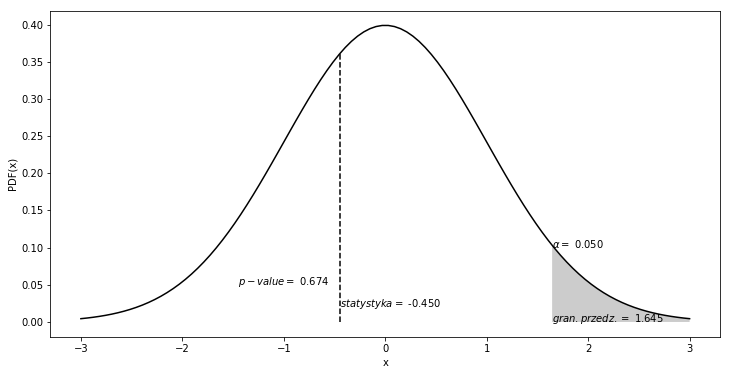

In [37]:
u_1=X.ppf(1-alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(L, 0, r'$gran.  przedz. = $ %.3f' % np.round(L,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$
## Wypisz przedział krytyczny

Statystyka:

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

Przedział krytyczny:

$$
\big(-\infty,-u(1-\frac{1}{2}\alpha)\big] \cup \big[u(1-\frac{1}{2}\alpha), +\infty \big)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


In [38]:
alpha = 0.05 # poziom istotności alfa, podane w zadaniu
bar_x = 1.4 # średnia arytm. podane w zadaniu 1.4
mu = 2 # hipoteza H0: mu = 2
s = 4 # s - odch.standard., podane w zadaniu = 4
u = (bar_x - mu)/s*np.sqrt(n)
print(mu)
print(bar_x)
print(s)
print(u)

2
1.4
4
-0.45000000000000007


In [65]:
left_R = -X.ppf(alpha)
left_L = -np.inf

right_L = X.ppf(alpha)
right_R = np.inf

print((left_L, right_L), '+', (left_R, right_R))

(-inf, -1.6448536269514729) + (1.6448536269514729, inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [67]:
# sprawdzenie czy wartość statystyki U wpada w prawy ogon
if (u < right_L or u > left_R):
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")
    
print('u =', u, 'right_L =', right_L, 'left_R =', left_R, )

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0
u = -0.45000000000000007 right_L = -1.6448536269514729 left_R = 1.6448536269514729


## wylicz p-value

In [91]:
p = X.cdf(u) + X.sf(-u)
print('p = ', p , 'alpha = ', alpha)

p =  0.6527104405758399 alpha =  0.05


## zweryfikuj hipotezę na podstawie wartości p-value

In [92]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

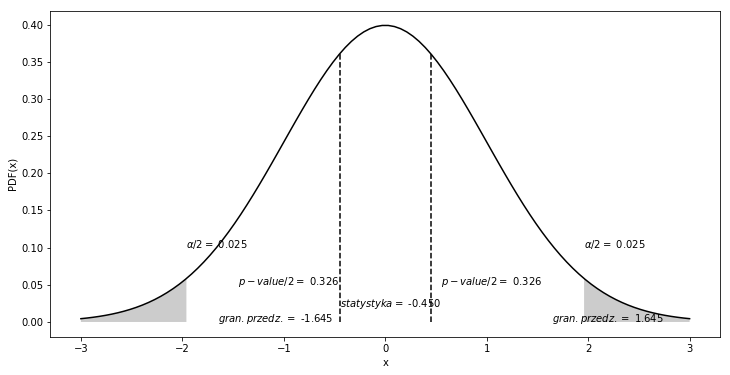

In [98]:
u_1 = X.isf(alpha/2)   # IFS(x) = SF(x)^(-1) = (1 - CDF(x))^(-1)
u_2 = X.ppf(alpha/2)   # PPF(x) = CDF(x)^(-1)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)

x2 = np.linspace(-3, u_2)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x2, y2, facecolor='#CCCCCC')

axs.text(u_1, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))
axs.text(u_2, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))

axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.vlines(-u, 0, X.pdf(-u), linestyles='--')

axs.text(u, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(right_L, 0, r'$gran.  przedz. = $ %.3f' % np.round(right_L,3))
axs.text(left_R, 0, r'$gran.  przedz. = $ %.3f' % np.round(left_R,3))

axs.text(u-1.0, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))
axs.text(u+1.0, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))

axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

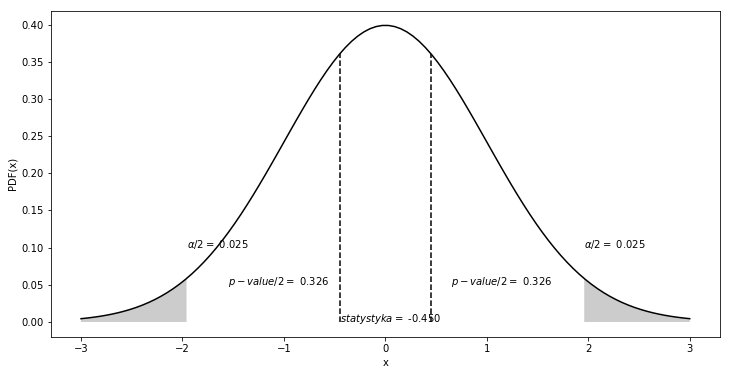